### Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score

# GridSearchCV finds the best combinatins of the hyperparameters in a param grid 
from sklearn.model_selection import GridSearchCV

%matplotlib inline

### Loading The Data

In [ ]:
data = pd.read_csv("data.csv",index_col=0)
# X,y must be of type of ndArray not a pd.DataFrame
categorical_columns = ['location','country','gender','symptom1','symptom2','symptom3','symptom4','symptom5']
for column in categorical_columns:
    tempdf = pd.get_dummies(data[column], prefix=column)
    data = pd.merge(
        left=data,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    data = data.drop(columns=column)
X = data.iloc[:, data.columns != 'result'].values
y = data.iloc[:,5].values
data

,age,vis_wuhan,from_wuhan,symptom6,diff_sym_hos,result,location_0,location_1,location_2,location_3,...,symptom4_7,symptom4_8,symptom4_9,symptom4_10,symptom4_11,symptom4_12,symptom5_0,symptom5_1,symptom5_2,symptom5_3
0,66.0,1,0,1,8,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,56.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,46.0,0,1,1,13,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,60.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,58.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,24.0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
859,35.0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
860,49.4,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
861,49.4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
# Test set is 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1,stratify=y) 

### K-Nearest Negihbors

#### Feature Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_train_norm = MinMaxScaler().fit_transform(X_train)
X_test_norm = MinMaxScaler().fit_transform(X_test)

#### Hyperparameter Tunning

In [ ]:
# finding the best K that gives the best score on the validation set
leaf_size = list(range(1,10))
n_neighbors = list(range(1,5))
p=[1,2]
knn_param_grid= dict(leaf_size=leaf_size,n_neighbors=n_neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

# the score to knn_clf_cv which is the best classifier
knn_clf_cv = GridSearchCV(knn_classifier, knn_param_grid, cv=10)


#### Training 

In [ ]:
# Picks the best classifier out of the classifiers with the best k for our application
best_knn_clf = knn_clf_cv.fit(X_train_norm,y_train).best_estimator_
best_knn_clf

KNeighborsClassifier(leaf_size=1, n_neighbors=2)

#### Testing

knn_model_f1-score = 0.7058823529411764
knn_model-precision = 1.0
knn_model-Recall = 0.5454545454545454


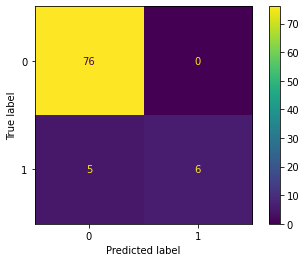

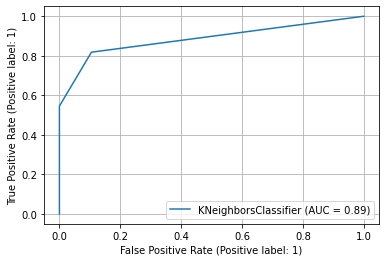

In [ ]:
# making predictions
y_pred_knn = best_knn_clf.predict(X_test_norm)

# Confusion Matrix
plot_confusion_matrix(best_knn_clf, X_test_norm, y_test)

# Precision, Recall, f1-score
print(f"knn_model_f1-score = {f1_score(y_test, y_pred_knn)}\nknn_model-precision = {precision_score(y_test,y_pred_knn)}\nknn_model-Recall = {recall_score(y_test,y_pred_knn)}")

# ROC curve
plot_roc_curve(best_knn_clf, X_test_norm, y_test)
plt.grid()

### Logistic Regression


#### Hyperparameter Tunning

In [ ]:
# C : 1**-5 -> 1**5 
log_param_grid = {
    "C" : np.logspace(-5, 5, 10)
}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_classifier = LogisticRegression(max_iter=10000)

# the score to log_clf_cv which is the best classifier
log_clf_cv = GridSearchCV(log_classifier, log_param_grid, cv=10)


#### Training 

In [ ]:
best_log_clf = log_clf_cv.fit(X_train,y_train).best_estimator_

In [ ]:
print(f"{best_log_clf.penalty = }\n{best_log_clf.C = }")

best_log_clf.penalty = 'l2'
best_log_clf.C = 46.41588833612782


#### Testing

Accuracy 0.9885057471264368
log_model_f1-score = 0.9523809523809523
log_model-precision = 1.0
log_model-Recall = 0.9090909090909091


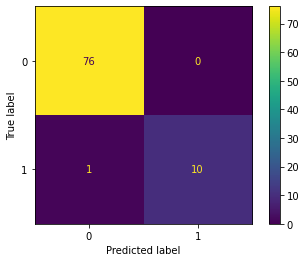

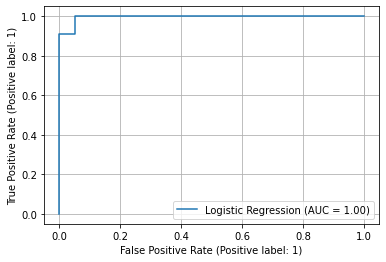

In [ ]:
from sklearn.metrics import plot_confusion_matrix, auc, roc_curve, RocCurveDisplay,plot_roc_curve

# making predictions
y_pred_log = best_log_clf.predict(X_test)

# Confusion Matrix
plot_confusion_matrix(best_log_clf, X_test, y_test)

# Precision, Recall, f1-score
print("Accuracy",accuracy_score(y_test, y_pred_log))
print(f"log_model_f1-score = {f1_score(y_test, y_pred_log)}\nlog_model-precision = {precision_score(y_test,y_pred_log)}\nlog_model-Recall = {recall_score(y_test,y_pred_log)}")
# ROC curve
plot_roc_curve(best_log_clf, X_test, y_test, name='Logistic Regression')
plt.grid()



### Naïve Bayes

#### Training with Hyperparameter Tuning

In [ ]:
from sklearn.naive_bayes import GaussianNB
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
best_naive_clf = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
best_naive_clf.fit(X_train, y_train)
print(best_naive_clf.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.02848035868435802)


#### Testing

niave_model_f1-score = 0.7777777777777778
niave_model-precision = 1.0
niave_model-Recall = 0.6363636363636364


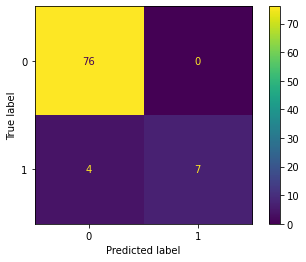

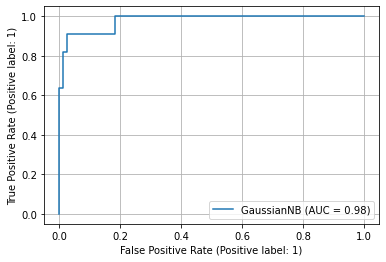

In [ ]:
# Testing
y_pred_naive = best_naive_clf.predict(X_test)

# Confusion Matrix 
plot_confusion_matrix(best_naive_clf, X_test, y_test)

# f1-score
print(f"niave_model_f1-score = {f1_score(y_test, y_pred_naive)}\nniave_model-precision = {precision_score(y_test,y_pred_naive)}\nniave_model-Recall = {recall_score(y_test,y_pred_naive)}")

# ROC curve 
plot_roc_curve(best_naive_clf.best_estimator_, X_test, y_test)
plt.grid()

### Decision Trees

#### Hyper Parameters Tuning

In [ ]:
# Identifing differenet hyperparameter to tune
DT_param_grid = [
    {   'criterion': ['gini', 'entropy'],
        'max_depth': list(range(4,13,1))
    }
]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()

# the score to DT_clf_cv which is the best classifier
DT_clf_cv =GridSearchCV(DT_classifier, DT_param_grid, cv=10)

#### Training 

In [ ]:
best_DT_clf = DT_clf_cv.fit(X_train,y_train).best_estimator_

In [ ]:
print(f"{best_DT_clf.max_depth = }\n{best_DT_clf.criterion = }")

best_DT_clf.max_depth = 10
best_DT_clf.criterion = 'gini'


#### Testing

DT_model_f1-score = 0.8571428571428572
DT_model-precision = 0.9
DT_model-Recall = 0.8181818181818182
0.9025119617224882


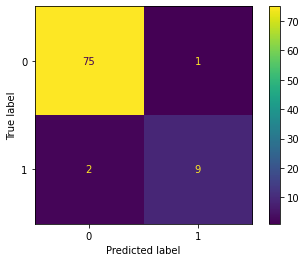

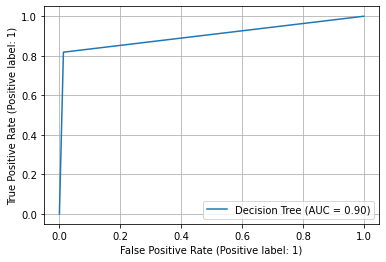

In [ ]:
# making predictions
y_pred_DT = best_DT_clf.predict(X_test)

# Confusion Matrix
plot_confusion_matrix(best_DT_clf, X_test, y_test)

# Precision, Recall, f1-score
print(f"DT_model_f1-score = {f1_score(y_test, y_pred_DT)}\nDT_model-precision = {precision_score(y_test,y_pred_DT)}\nDT_model-Recall = {recall_score(y_test,y_pred_DT)}")
# ROC curve
plot_roc_curve(best_DT_clf, X_test, y_test, name='Decision Tree')
plt.grid()


### Support Vector Machine 

#### Hyperparameter Tunning

In [ ]:
svm_param_grid = {
    "C": np.logspace(-5, 5, 10),
    "kernel": ['poly', 'rbf'],
    "degree": list(range(1,10))
}


In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC()

svm_clf_cv = GridSearchCV(svm_classifier, svm_param_grid, cv=10)

#### Training 

In [ ]:
best_svm_clf = svm_clf_cv.fit(X_train,y_train).best_estimator_
best_svm_clf

SVC(C=7742.636826811277, degree=1)

#### Testing

svm_model_f1-score = 0.9523809523809523
svm_model-precision = 1.0
svm_model-Recall = 0.9090909090909091


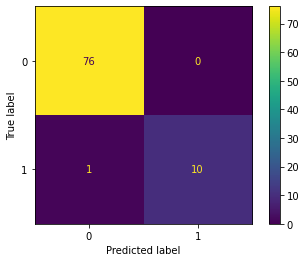

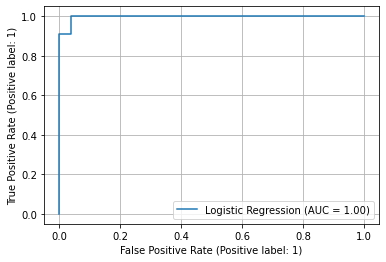

In [ ]:
# making predictions
y_pred_svm = best_svm_clf.predict(X_test)

# Confusion Matrix
plot_confusion_matrix(best_svm_clf, X_test, y_test)

# Precision, Recall, f1-score
print(f"svm_model_f1-score = {f1_score(y_test, y_pred_svm)}\nsvm_model-precision = {precision_score(y_test,y_pred_svm)}\nsvm_model-Recall = {recall_score(y_test,y_pred_svm)}")

# ROC curve
plot_roc_curve(best_svm_clf, X_test, y_test, name='Logistic Regression')
plt.grid()

### Comparisons
 

#### ROC Curve and AUC

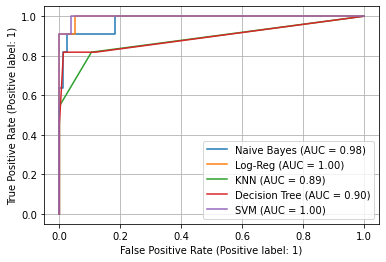

In [ ]:
display = plot_roc_curve(best_naive_clf, X_test, y_test,name="Naive Bayes")
plot_roc_curve(best_log_clf, X_test, y_test, ax=display.ax_ ,name="Log-Reg")
plot_roc_curve(best_knn_clf,X_test_norm,y_test,ax=display.ax_,name="KNN")
plot_roc_curve(best_DT_clf,X_test,y_test,ax=display.ax_,name="Decision Tree")
plot_roc_curve(best_svm_clf,X_test,y_test,ax=display.ax_,name="SVM")
plt.grid()
plt.show()


#### This function makes a spider plot which is suitable for our application

In [ ]:
def make_spider(row, title, color):

    # number of variable
    categories = list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3, 2, row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([.25, .5, 0.75, 1], ["0.25", "0.5",
               "0.75", "1"], color="grey", size=7)
    plt.ylim(0, 1)

    # Ind1
    values = df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    


#### Accuracy, f1_score, Precision, Recall, AUC

         group  f1_score  Precision    Recall       AUC  Accuracy
0      Log-Reg  0.952381        1.0  0.909091  0.954545  0.988506
1  Naive Bayes  0.777778        1.0  0.636364  0.818182  0.954023
2          KNN  0.705882        1.0  0.545455  0.772727  0.942529
3        DTree  0.857143        0.9  0.818182  0.902512  0.965517
4          SVM  0.952381        1.0  0.909091  0.954545  0.988506


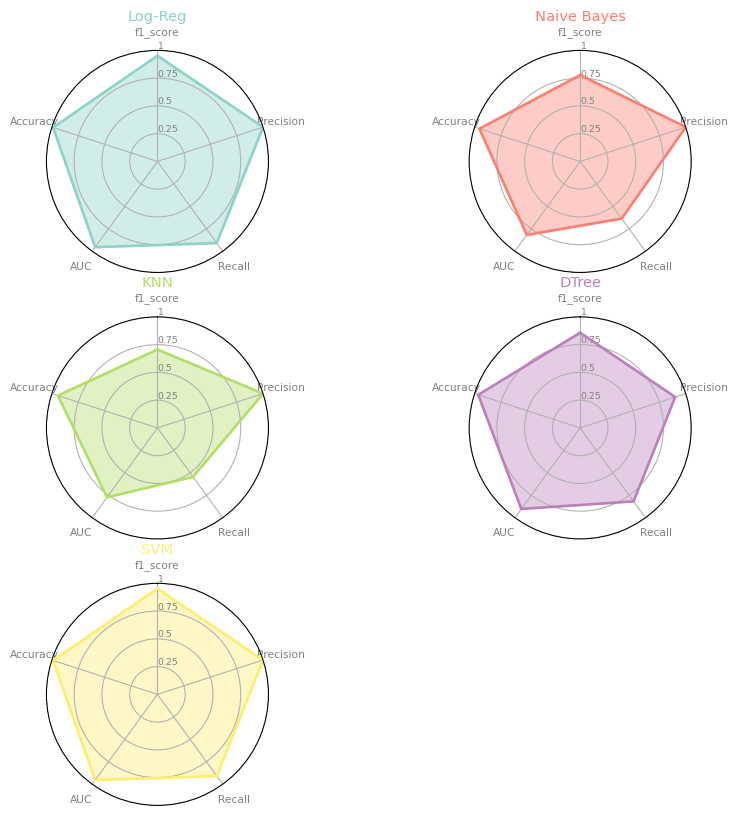

In [ ]:
# Libraries
from math import pi

from sklearn.metrics import roc_auc_score
# Set data
df = pd.DataFrame({
    'group': ['Log-Reg', 'Naive Bayes', 'KNN', 'DTree', 'SVM'],
    'f1_score': [f1_score(y_test, y_pred_log),  f1_score(y_test, y_pred_naive), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_DT), f1_score(y_test, y_pred_svm)],
    'Precision': [precision_score(y_test, y_pred_log),  precision_score(y_test, y_pred_naive), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_DT), precision_score(y_test, y_pred_svm)],
    'Recall': [recall_score(y_test, y_pred_log),  recall_score(y_test, y_pred_naive),  recall_score(y_test, y_pred_knn),  recall_score(y_test, y_pred_DT),  recall_score(y_test, y_pred_svm)],
    'AUC': [roc_auc_score(y_test, y_pred_log),  roc_auc_score(y_test, y_pred_naive),  roc_auc_score(y_test, y_pred_knn), roc_auc_score(y_test, y_pred_DT), roc_auc_score(y_test, y_pred_svm)],
    'Accuracy':  [accuracy_score(y_test, y_pred_log),  accuracy_score(y_test, y_pred_naive),  accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_DT), accuracy_score(y_test, y_pred_svm)]
})



# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi = 96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set3", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider(row=row, title=df['group'][row], color=my_palette(row))
print(df)